In [2]:

import os
import pandas as pd
import numpy as np
def load_data(folder_path):
  data = {}
  for filename in os.listdir(folder_path):
      file_path = os.path.join(folder_path, filename)
      if os.path.isfile(file_path):
          with open(file_path, 'r') as file:
              df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
              #df1 = df1.fillna(df1.mean()) # Replace NaN with column average
              data[filename] = df1
    
              num_datapts = len(df1["des_flux"])
  # Combine all the data into a single dataframe
  df = pd.concat(data.values())

  return df, num_datapts


folder_path = './Ground Truth Smoothed' ### Don't change this one
data = {}
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path) and file_path.endswith('.csv'):
        with open(file_path, 'r') as file:
            expt_df = pd.read_csv(file_path, header=None, names=['K', 'des_flux'], index_col=None, squeeze = True)
            expt_tds = expt_df.iloc[:, 1].values
            expt_datapts = len(expt_df["des_flux"])
            data[filename] = expt_df    

df = pd.concat(data.values())


expt_des_flux=df['des_flux']
expt_des_flux=expt_des_flux.tolist()
expt_files=int(len(expt_des_flux)/expt_datapts) 
expt_des_flux=np.reshape(expt_des_flux, [expt_files, expt_datapts])

Predictions Based on Raw Spectra


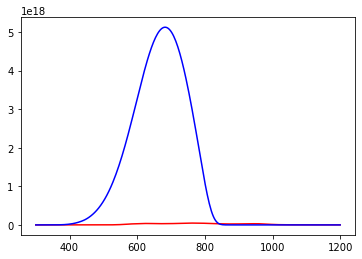

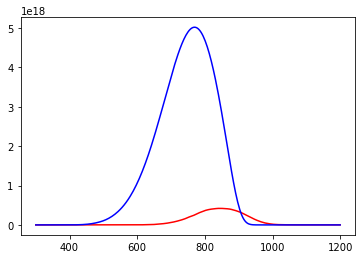

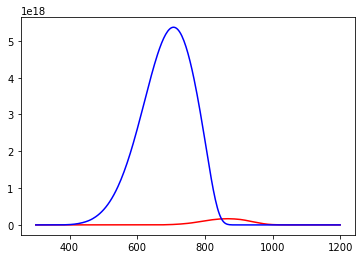

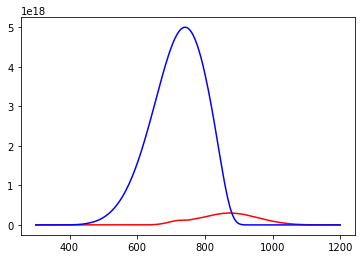

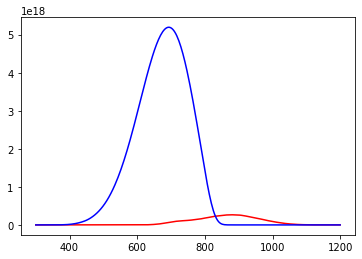

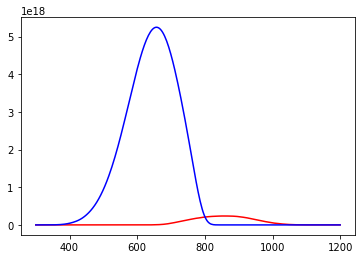

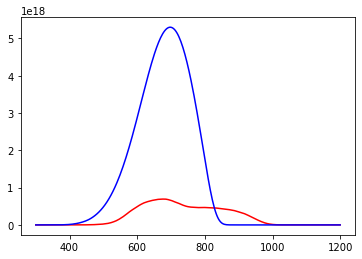

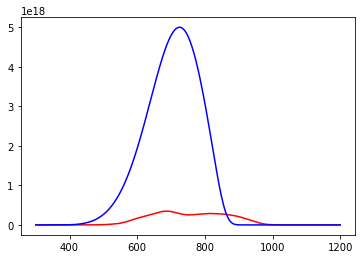

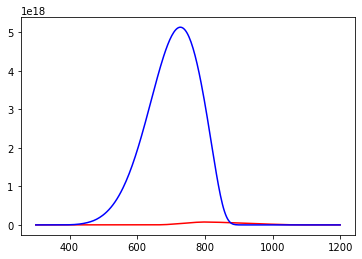

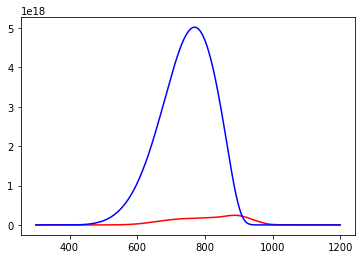

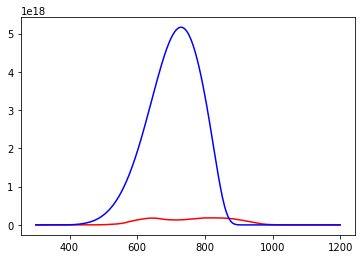

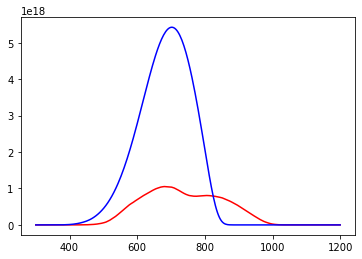

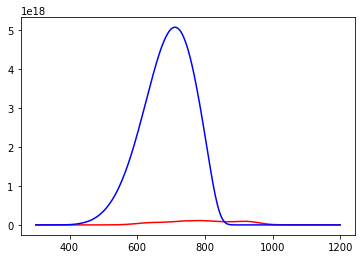

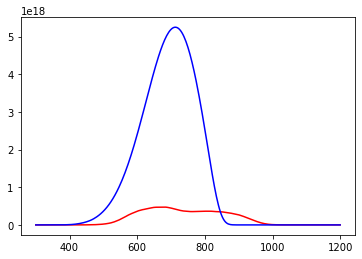

Predictions Based on Spectra Features


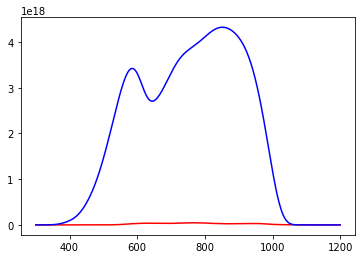

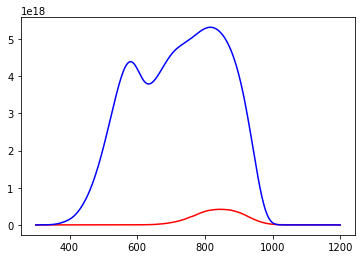

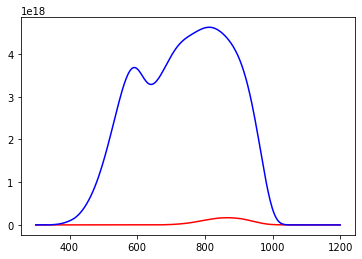

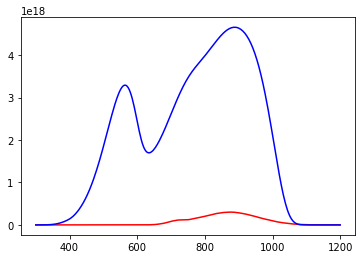

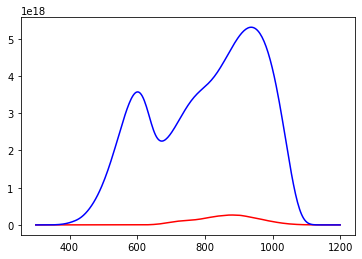

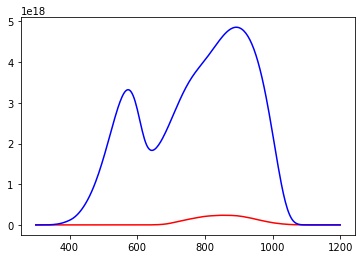

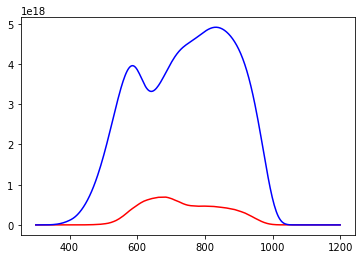

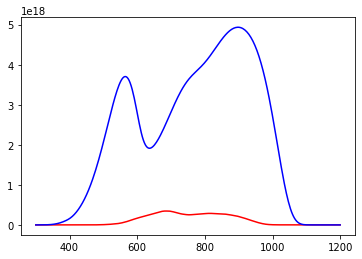

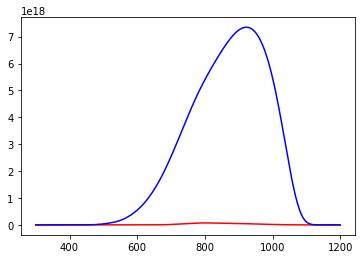

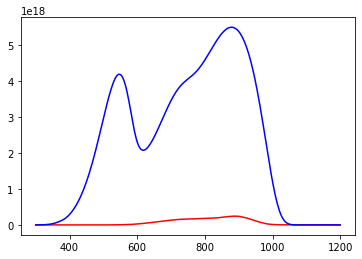

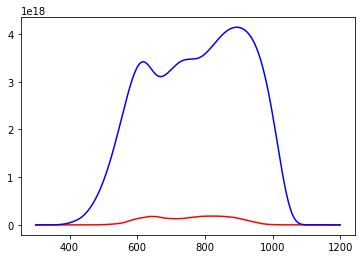

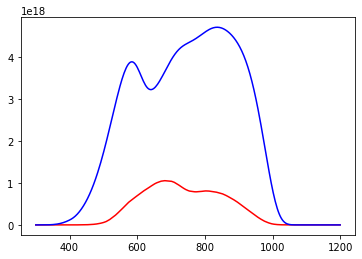

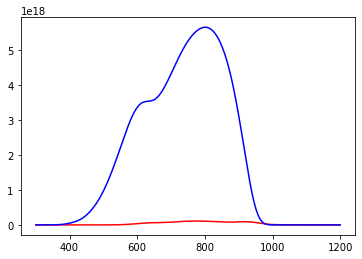

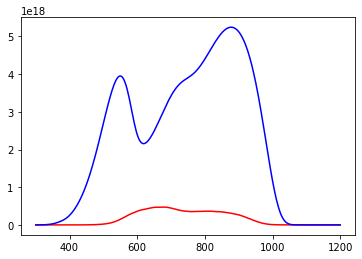

Averaging previous two predictions


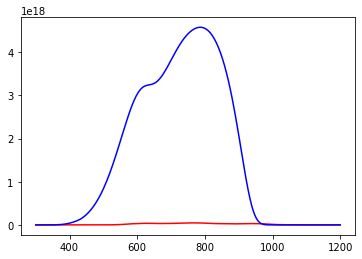

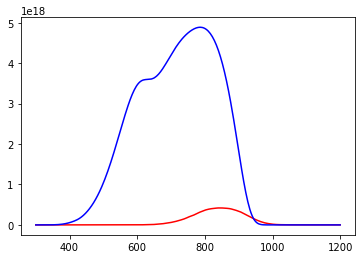

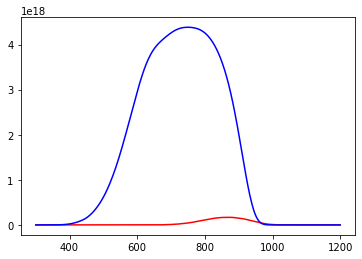

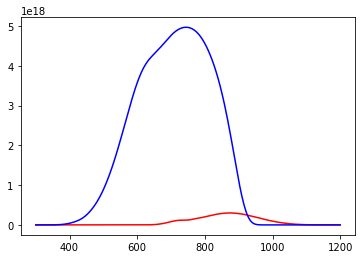

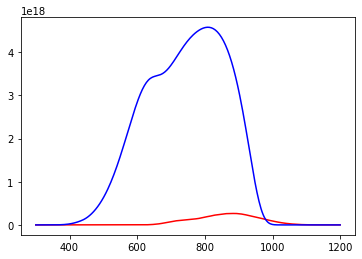

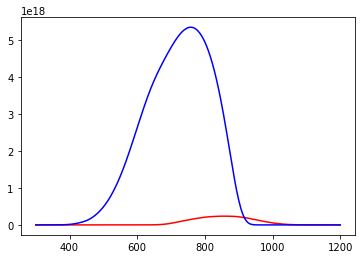

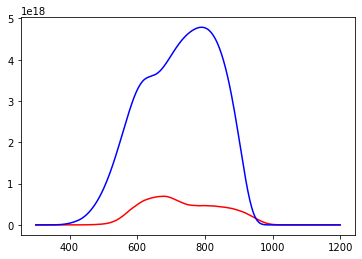

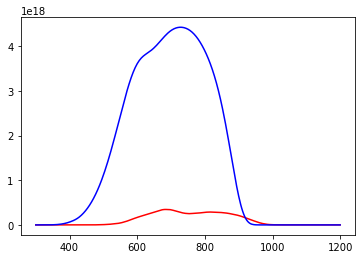

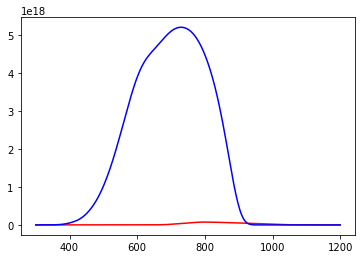

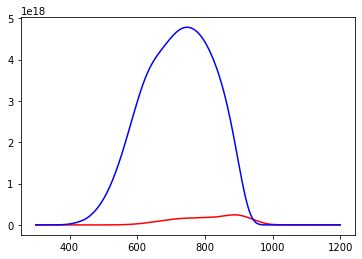

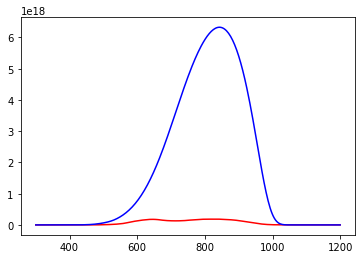

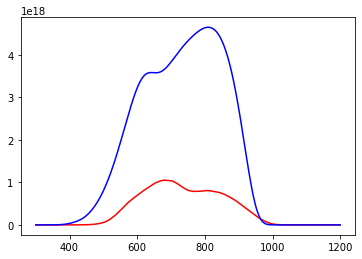

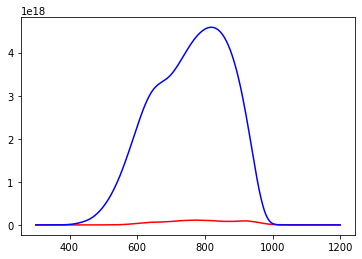

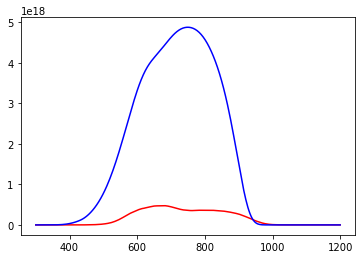

In [3]:
# Loading des flux based on the prediced parameters into a dataframe
# fix the names from mathematica if you're pulling the 
# parameters automatically

import spectrapepper as spep
from scipy import signal
import pandas as df
import matplotlib.pyplot as plt

folder_path = './raw_pred_des/' ### Change folder path 
df, pred_datapts = load_data(folder_path)

# number of predicted and groundtruth files must match

pred_des_flux=df['des_flux']
pred_des_flux=pred_des_flux.tolist()
pred_files=int(len(pred_des_flux)/pred_datapts) 
pred_des_flux=np.reshape(pred_des_flux, [pred_files, pred_datapts])

####

folder_path = './combined_pred_des/' 
df, pred_datapts = load_data(folder_path)

combined_des_flux=df['des_flux']
combined_des_flux=combined_des_flux.tolist()
pred_files=int(len(combined_des_flux)/pred_datapts) 
combined_des_flux=np.reshape(combined_des_flux, [pred_files, pred_datapts])

####

folder_path = './feat_pred_des/' 
df, pred_datapts = load_data(folder_path)

feat_des_flux=df['des_flux']
feat_des_flux=feat_des_flux.tolist()
pred_files=int(len(feat_des_flux)/pred_datapts) 
feat_des_flux=np.reshape(feat_des_flux, [pred_files, pred_datapts])



import matplotlib.pyplot as plt

### checking the simulated des flux with the experimental/ground truth des flux
def plot_spectra(pred_des_flux,expt_des_flux,expt_files):
    plt.figure() # move outside of for loop to separate the plots
    for i in range(0,expt_files):
        des_expt = np.array(expt_des_flux[i])
        des_expt = des_expt.reshape(1, -1)

        des_pred = np.array(pred_des_flux[i])
        des_pred = des_pred.reshape(1, -1)

        des_expt = des_expt.flatten()
        des_pred = des_pred.flatten()
        x1 = np.linspace(300,1200,902)
        x2 = np.linspace(300,1200,301)
        plt.figure() #to overlay the plots
        
        plt.plot(x1,des_expt, 'r') 
        plt.plot(x2,des_pred, 'b')
    plt.show()
print(f'Predictions Based on Raw Spectra')
plot_spectra(pred_des_flux, expt_des_flux, expt_files)
print(f'Predictions Based on Spectra Features')
plot_spectra(feat_des_flux, expt_des_flux, expt_files)
print(f'Averaging previous two predictions')
plot_spectra(combined_des_flux, expt_des_flux, expt_files)

# Red = ground truth
# Blue = predicted